# NOYCE Internship Paper Visual Plot

In [34]:
# importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [35]:
# loading dataset
student_data = pd.read_csv('Noyce_data.csv', index_col=False)

In [36]:
student_data

,Student,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,S1,4.0,3.3,3.3,3.7,4.3,3.0,2.7,3.3,3.0,4.5,3.5,4.5
1,S2,4.0,3.5,5.0,4.0,4.0,3.5,4.0,4.0,3.5,4.5,4.0,3.5
2,S3,4.3,4.0,3.7,4.3,4.3,3.7,4.3,4.5,4.0,5.0,4.5,4.0
3,S4,4.0,4.0,4.0,4.0,4.0,4.0,3.5,4.0,3.5,4.0,5.0,4.0
4,S5,4.0,4.3,4.0,4.0,4.3,4.3,4.0,4.0,4.0,4.3,4.5,4.0
5,S6,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.5,4.0,4.0
6,S7,4.3,4.0,4.3,4.3,4.7,4.7,4.0,4.7,4.0,4.3,4.3,5.0
7,S8,3.7,4.0,3.3,4.3,4.0,3.0,3.3,3.7,3.3,4.3,3.7,4.0
8,S9,4.5,4.0,4.5,4.5,4.5,4.5,4.5,4.0,4.0,4.5,5.0,4.0
9,S10,4.0,4.0,4.0,4.0,4.5,4.0,4.0,4.0,4.0,3.5,4.0,4.0


In [37]:
# Strip whitespace from column names
student_data.columns = student_data.columns.str.strip()

# Strip whitespace from each cell in the dataframe
#stripped_student_data = student_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
student_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

,Student,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,S1,4.0,3.3,3.3,3.7,4.3,3.0,2.7,3.3,3.0,4.5,3.5,4.5
1,S2,4.0,3.5,5.0,4.0,4.0,3.5,4.0,4.0,3.5,4.5,4.0,3.5
2,S3,4.3,4.0,3.7,4.3,4.3,3.7,4.3,4.5,4.0,5.0,4.5,4.0
3,S4,4.0,4.0,4.0,4.0,4.0,4.0,3.5,4.0,3.5,4.0,5.0,4.0
4,S5,4.0,4.3,4.0,4.0,4.3,4.3,4.0,4.0,4.0,4.3,4.5,4.0
5,S6,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.5,4.0,4.0
6,S7,4.3,4.0,4.3,4.3,4.7,4.7,4.0,4.7,4.0,4.3,4.3,5.0
7,S8,3.7,4.0,3.3,4.3,4.0,3.0,3.3,3.7,3.3,4.3,3.7,4.0
8,S9,4.5,4.0,4.5,4.5,4.5,4.5,4.5,4.0,4.0,4.5,5.0,4.0
9,S10,4.0,4.0,4.0,4.0,4.5,4.0,4.0,4.0,4.0,3.5,4.0,4.0


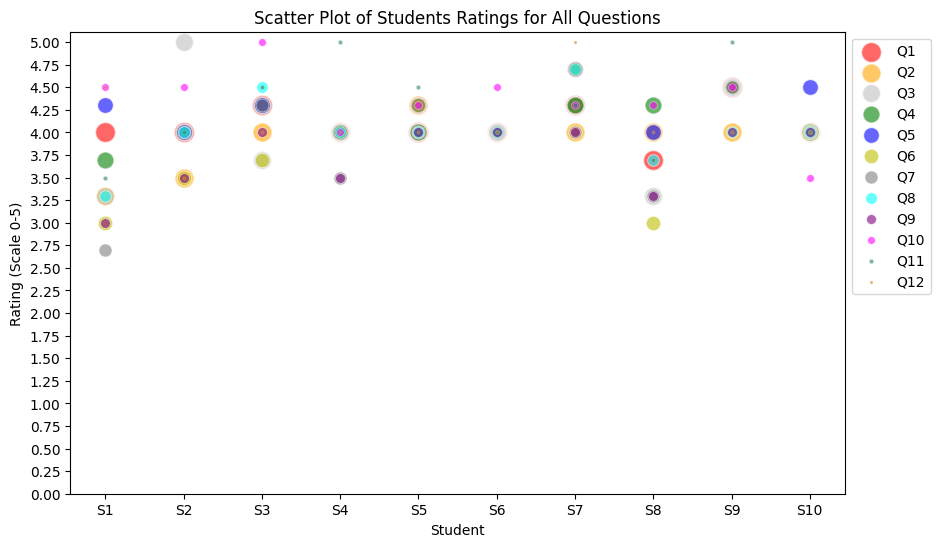

In [38]:
# creating function to place a specific color for a question
def question_color(ques_column_name):
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'silver', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'gray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'seagreen', 'Q12': 'darkgoldenrod',
    }
    return color_dict.get(ques_column_name, 'black')  

# Define the size increments
base_size = 210
size_decrement = 20

# creating a dictionary to increase the size of the datapoint associated with each question
sizes_dict = {
    'Q1': base_size,
    'Q2': base_size - size_decrement,
    'Q3': base_size - 2 * size_decrement,
    'Q4': base_size - 3 * size_decrement,
    'Q5': base_size - 4 * size_decrement,
    'Q6': base_size - 5 * size_decrement,
    'Q7': base_size - 6 * size_decrement,
    'Q8': base_size - 7 * size_decrement,
    'Q9': base_size - 8 * size_decrement,    
    'Q10': base_size - 9 * size_decrement,
    'Q11': base_size - 10 * size_decrement,
    'Q12': base_size - 11 * size_decrement,
} 

# Adjusting sizes to ensure they are non-negative
for key in sizes_dict:
    if sizes_dict[key] < 0:
        sizes_dict[key] = 5 #Set a minimum size

# Creating a scatter plot for each question
plt.figure(figsize=(10, 6))
for column in ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12']:
    sns.scatterplot(x=student_data['Student'], y=column, data=student_data, color=question_color(column), s=sizes_dict[column], label=column, alpha=0.6)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# adjusting legen
legend = plt.legend(bbox_to_anchor=(1, 1), loc = 'upper left')

plt.show()

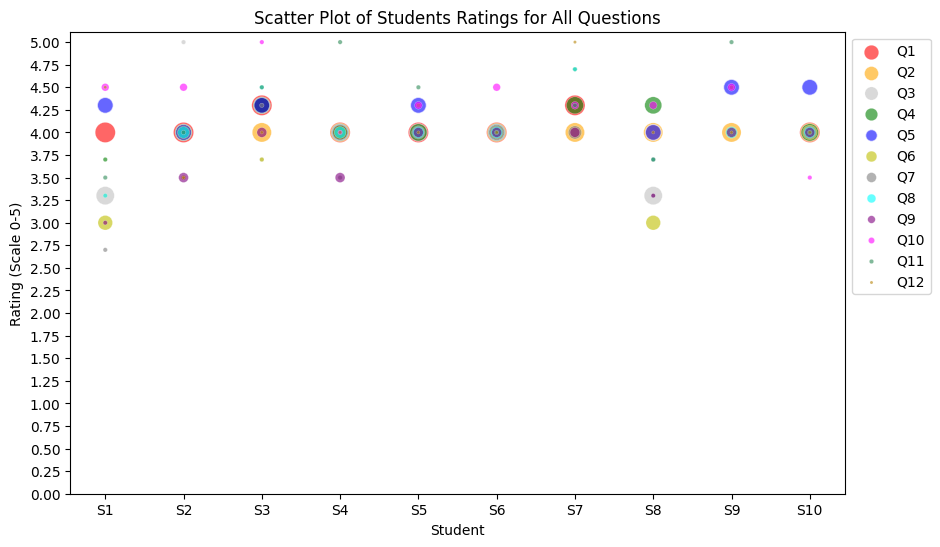

In [39]:
# Define function to determine point size
def get_point_size(student, column, data):
    threshold = 0.1  # Define a threshold to consider points as stacked
    point_size = sizes_dict[column]
    student_rating = data.loc[data['Student'] == student, column].values[0]
    
    # Check if there are any other points close to this point
    for other_student in data['Student']:
        if other_student != student:
            other_rating = data.loc[data['Student'] == other_student, column].values[0]
            if abs(student_rating - other_rating) < threshold:
                return point_size
    
    # If no close points found, return a smaller size
    return min(10, point_size)

# creating function to place a specific color for a question
def question_color(ques_column_name):
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'silver', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'gray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'seagreen', 'Q12': 'darkgoldenrod',
    }
    return color_dict.get(ques_column_name, 'black')  

# Define the size increments
base_size = 210
size_decrement = 20

# creating a dictionary to increase the size of the datapoint associated with each question
sizes_dict = {
    'Q1': base_size,
    'Q2': base_size - size_decrement,
    'Q3': base_size - 2 * size_decrement,
    'Q4': base_size - 3 * size_decrement,
    'Q5': base_size - 4 * size_decrement,
    'Q6': base_size - 5 * size_decrement,
    'Q7': base_size - 6 * size_decrement,
    'Q8': base_size - 7 * size_decrement,
    'Q9': base_size - 8 * size_decrement,    
    'Q10': base_size - 9 * size_decrement,
    'Q11': base_size - 10 * size_decrement,
    'Q12': base_size - 11 * size_decrement,
} 

# Adjusting sizes to ensure they are non-negative
for key in sizes_dict:
    if sizes_dict[key] < 0:
        sizes_dict[key] = 5 #Set a minimum size

# Creating a scatter plot for each question
plt.figure(figsize=(10, 6))
for column in student_data.columns[1:]:
    sizes = [get_point_size(student, column, student_data) for student in student_data['Student']]
    sns.scatterplot(x=student_data['Student'], y=column, data=student_data, color=question_color(column), s=sizes, label=column, alpha=0.6)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# adjusting legen
legend = plt.legend(bbox_to_anchor=(1, 1), loc = 'upper left')

plt.show()

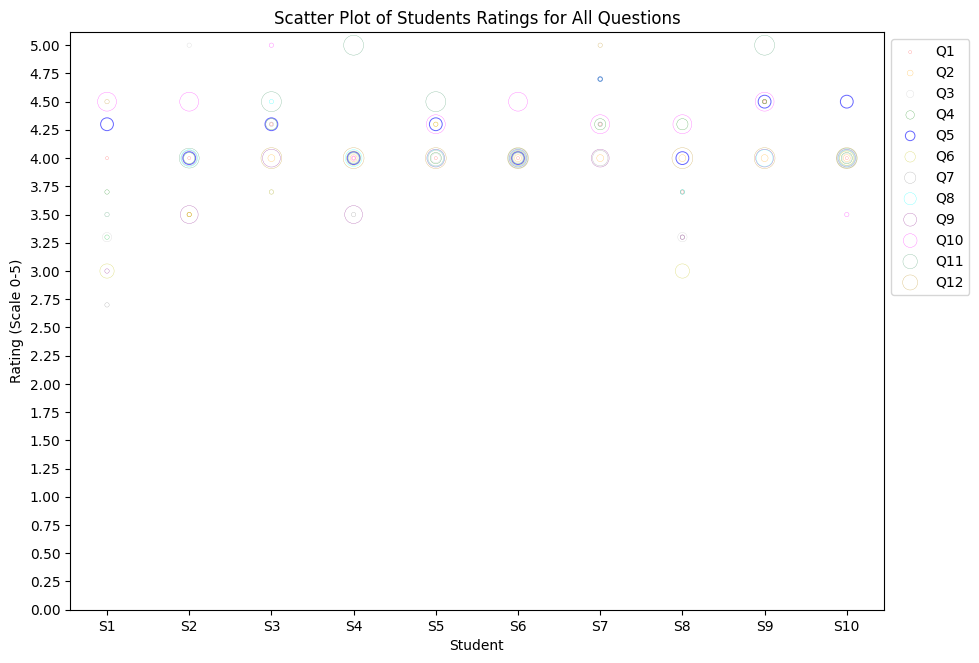

In [47]:
# Define function to determine point size
def get_point_size(student, column, data):
    threshold = 0.1  # Define a threshold to consider points as stacked
    point_size = sizes_dict[column]
    student_rating = data.loc[data['Student'] == student, column].values[0]
    
    # Check if there are any other points close to this point
    for other_student in data['Student']:
        if other_student != student:
            other_rating = data.loc[data['Student'] == other_student, column].values[0]
            if abs(student_rating - other_rating) < threshold:
                return point_size
    
    # If no close points found, return a smaller size
    return min(10, point_size)

# creating function to place a specific color for a question
def question_color(ques_column_name):
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'silver', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'y', 'Q7': 'gray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'seagreen', 'Q12': 'darkgoldenrod',
    }
    return color_dict.get(ques_column_name, 'black')  

# Define the size increments
base_size = 5
size_increment = 20

# creating a dictionary to increase the size of the datapoint associated with each question
sizes_dict = {
    'Q1': base_size,
    'Q2': base_size + size_increment,
    'Q3': base_size + 2 * size_increment,
    'Q4': base_size + 3 * size_increment,
    'Q5': base_size + 4 * size_increment,
    'Q6': base_size + 5 * size_increment,
    'Q7': base_size + 6 * size_increment,
    'Q8': base_size + 7 * size_increment,
    'Q9': base_size + 8 * size_increment,    
    'Q10': base_size + 9 * size_increment,
    'Q11': base_size + 10 * size_increment,
    'Q12': base_size + 11 * size_increment,
} 

# Adjusting sizes to ensure they are non-negative
for key in sizes_dict:
    if sizes_dict[key] < 0:
        sizes_dict[key] = 5 #Set a minimum size

# Creating a scatter plot for each question
plt.figure(figsize=(10.5, 7.5))
for column in student_data.columns[1:]:
    sizes = [get_point_size(student, column, student_data) for student in student_data['Student']]
    sns.scatterplot(x=student_data['Student'], y=column, data=student_data, edgecolor=question_color(column), facecolor='none', 
                    s=sizes, label=column, alpha=0.6)

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# adjusting legen
legend = plt.legend(bbox_to_anchor=(1, 1), loc = 'upper left')

plt.show()

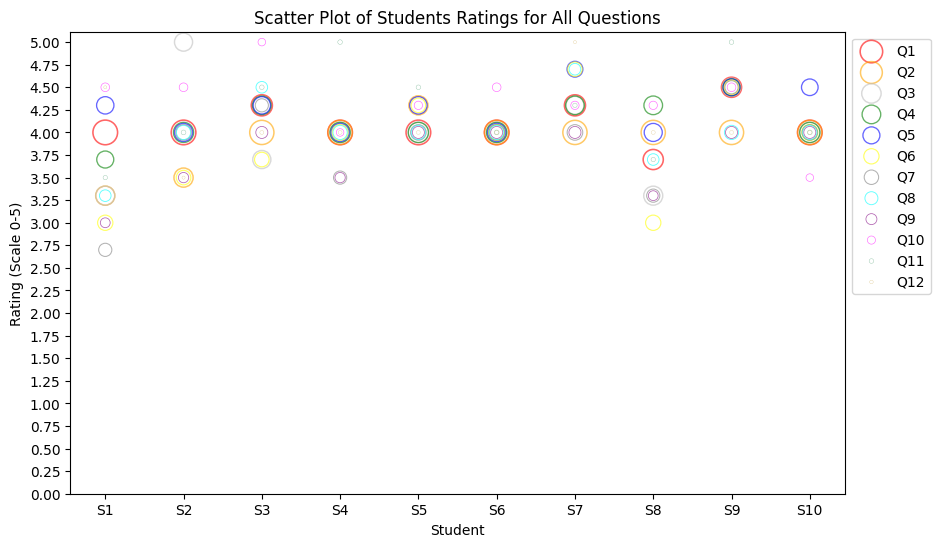

In [42]:
# Function to assign color to each question
def question_color(ques_column_name):
    color_dict = {
        'Q1': 'red', 'Q2': 'orange', 'Q3': 'silver', 'Q4': 'green', 'Q5': 'blue', 
        'Q6': 'yellow', 'Q7': 'gray', 'Q8': 'aqua', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'seagreen', 'Q12': 'darkgoldenrod',
    }
    return color_dict.get(ques_column_name, 'black')

# Define the size increments
base_size = 210
size_decrement = 20

# Creating a dictionary to increase the size of the datapoint associated with each question
sizes_dict = {
    'Q1': base_size,
    'Q2': base_size - size_decrement,
    'Q3': base_size - 2 * size_decrement,
    'Q4': base_size - 3 * size_decrement,
    'Q5': base_size - 4 * size_decrement,
    'Q6': base_size - 5 * size_decrement,
    'Q7': base_size - 6 * size_decrement,
    'Q8': base_size - 7 * size_decrement,
    'Q9': base_size - 8 * size_decrement,    
    'Q10': base_size - 9 * size_decrement,
    'Q11': base_size - 10 * size_decrement,
    'Q12': base_size - 11 * size_decrement,
}

# Adjusting sizes to ensure they are non-negative
for key in sizes_dict:
    if sizes_dict[key] < 0:
        sizes_dict[key] = 5  # Set a minimum size

# Function to determine the point size based on frequency
def get_point_size_based_on_frequency(student, column, data, sizes_dict):
    student_rating = data.loc[data['Student'] == student, column].values[0]
    frequency = sum(data[column] == student_rating)
    # Increase the size with frequency
    return sizes_dict[column] * (1 + 0.1 * (frequency - 1))

# Creating a scatter plot for each question
plt.figure(figsize=(10, 6))
for column in student_data.columns[1:]:
    sizes = [get_point_size_based_on_frequency(student, column, student_data, sizes_dict) for student in student_data['Student']]
    sns.scatterplot(
        x=student_data['Student'], y=column, data=student_data, 
        edgecolor=question_color(column), facecolor='none', s=sizes, 
        label=column, alpha=0.6
    )

# setting major ticks for y-axis
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00], ['0.00', '0.25', '0.50', '0.75', '1.00', '1.25', '1.50', '1.75', '2.00', '2.25', '2.50', '2.75', '3.00', '3.25', '3.50', '3.75', '4.00', '4.25', '4.50', '4.75', '5.00'])

# Add labels and title
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')
plt.title('Scatter Plot of Students Ratings for All Questions')

# Adjusting legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()